## Generation-time branch attraction

This notebook focuses on Ne effects

In [1]:
import toytree
import toyplot, toyplot.svg
import ipcoal
import numpy as np
import ipyrad.analysis as ipa

### Simulation scenario with deep divergences (crown 25Ma)

In [18]:
# get an ultrametric imbalanced tree
tree = toytree.rtree.baltree(16, treeheight=25e6)
tree.draw(ts='p');

<svg class="toyplot-canvas-Canvas" height="265.0px" id="tc9553e28c37f4493bc21e85e7e20a6f4" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 265.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 12500000 25000000

In [19]:
# store the alphanumeric order of names on the tree
NAMEORDER = tree.get_tip_labels()

### Species tree in units of generations
To setup a simulation on this tree we need branch lengths to be in units of generations. If we assume that 1 generation = 1 year then nothing has to be done. Here we assume that generations times are 1 for half of the taxa on the tree, but 1 generation = 10 years for several other taxa. The tree below shows that this looks like in terms of the transformed branch lengths. 

Here the edge lengths of the species tree are all the same in coalescent units.

In [20]:
# set gentime on nodes
stree = tree.set_node_values(
    feature="g", values={i: 10 for i in (0,1,16,4,5,18,10,11,21,14,15,23)}, default=1,
)

# convert edges to time in units of generations
gtree = tree.set_node_values(
    feature="dist", values={i: j.dist / j.g for (i, j) in stree.idx_dict.items()}
)

In [24]:
# show tc (coalescent time units) for all node dists
gtree.get_node_values("dist", 1, 1) / (2 * 2.5e6)

array([1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 0.125, 1.25 ,
       0.125, 1.25 , 1.25 , 0.125, 1.25 , 0.125, 0.125, 0.125, 1.25 ,
       1.25 , 0.125, 0.125, 1.25 , 1.25 , 1.25 , 1.25 , 0.125, 0.125,
       1.25 , 1.25 , 0.125, 0.125])

In [25]:
# draw tree showing Ne and g dists
gtree.draw(ts='p', width=400, node_sizes=0, node_labels=False, edge_type='p');

<svg class="toyplot-canvas-Canvas" height="265.0px" id="t5467334fd06644f3b76f2ea95939979a" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 265.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 12500000 25000000

### Example sequential genealogies

In [49]:
# simulate K unlinked genealogies
u_model = ipcoal.Model(gtree, Ne=2.5e6, seed=12345)
u_model.sim_trees(5000)
u_trees = toytree.mtree(u_model.df.genealogy)
u_trees.draw(ts='n', layout='d', height=225, width=900);
print(len(u_trees))

5000


<svg class="toyplot-canvas-Canvas" height="225.0px" id="t573fffde684d45d7bde0e3a84c4a4578" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 225.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r3 r2 r1 r0 r7 r6 r5 r4 r13 r12 r15 r14 r9 r8 r10 r11 r3 r2 r1 r0 r7 r6 r4 r5 r11 r10 r9 r8 r13 r12 r14 r15 r9 r8 r10 r11 r13 r12 r15 r14 r5 r4 r7 r6 r3 r2 r1 r0 r9 r8 r11 r14 r13 r12 r15 r10 r7 r6 r4 r5 r0 r3 r2 r1

In [50]:
# simulate K linked genealogies
l_model = ipcoal.Model(gtree, Ne=2.5e6, seed=12345)
l_model.sim_trees(nloci=1, nsites=50000)
l_trees = toytree.mtree(l_model.df.genealogy)
l_trees.draw(ts='n', layout='d', height=225, width=900);
print(len(l_trees))

5516


<svg class="toyplot-canvas-Canvas" height="225.0px" id="t022e81ec0b644c05a26c434b539b3b8a" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 225.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r7 r6 r5 r4 r3 r0 r1 r2 r13 r12 r14 r15 r11 r10 r9 r8 r7 r6 r5 r4 r3 r0 r1 r2 r14 r13 r12 r15 r11 r10 r9 r8 r7 r6 r5 r4 r3 r0 r1 r2 r14 r13 r12 r15 r11 r10 r9 r8 r7 r6 r5 r4 r3 r0 r1 r2 r14 r13 r12 r15 r11 r10 r9 r8

### Are branches attracted by generation times on true genealogies?

- current approach is to measure topological pairwise dist between all nodes. 

- alternative could be to measure avg pairwise dist on each node too all other nodes...

In [55]:
def topo_dist(tree):
    """
    Return alphanumeric name ordered array of topo dist
    between all nodes on a tree
    """
    t1 = tree.unroot()
    
    # array of tips in alphanumeric ordr
    arr = np.zeros((len(t1), len(t1)), dtype=float)
    
    # iterate to compare all tips to tips
    labels = NAMEORDER
    for idx1 in range(len(t1)):
        for idx2 in range(len(t1)):
            if idx1 != idx2:
                
                # get distance between tips on every tree
                node1 = t1.idx_dict[idx1]
                node2 = t1.idx_dict[idx2]
                dist = t1.treenode.get_distance(
                    node1, node2, topology_only=True,
                )
                nidx1 = labels.index(node1.name)
                nidx2 = labels.index(node2.name)
                arr[nidx1, nidx2] = dist
    return arr

In [56]:
def sequential_dist(trees):
    """
    Return array of topo dists between nodes on sequential trees
    in ordered input.
    """
    arrs = []
    dists = None
    for tree in trees:
        if dists is not None:
            diff = abs(dists - topo_dist(tree))
            arrs.append(diff)
        dists = topo_dist(tree)
    return np.array(arrs)

In [57]:
def distance_dist(df, dist=100, nsamples=1000):
    """
    Return array of topo dists between nodes on a chrom separated
    by a set distance in bp.
    """
    arrs = []
    
    # randomly sample 1000 trees
    tidxs = np.random.uniform(df.start.min(), df.start.max(), nsamples)
    
    for tidx in tidxs:
        
        # sample random tree
        t1 = df.loc[df.end >= tidx, "genealogy"].iloc[0]
        
        # sample another tree dist away
        if tidx + dist < df.end.max():
            t2 = df.loc[df.end >= tidx + dist, "genealogy"].iloc[0]
        else:
            t2 = df.loc[df.end >= tidx - dist, "genealogy"].iloc[0]

        # get topo distance between the two trees
        tree1 = toytree.tree(t1)
        tree2 = toytree.tree(t2)
        diff = abs(topo_dist(tree1) - topo_dist(tree2))
        
        # store result
        arrs.append(diff)
    return np.array(arrs)

In [58]:
def plot_matrix(dat):
    
    # get min and max of the off-diagonal elements
    dat = dat.copy()
    dat[np.diag_indices_from(dat)] = np.nanmean(dat)
    cmap = toyplot.color.LinearMap(domain_min=dat.min(), domain_max=dat.max())
    canvas = toyplot.Canvas(320, 300)
    ax1 = canvas.table(rows=dat.shape[0], columns=dat.shape[1], bounds=(50, 250, 50, 250))

    # apply colors to cells but not diagonals
    for ridx in range(dat.shape[0]):
        for cidx in range(dat.shape[1]):
            
            if ridx == cidx:
                ax1.cells.cell[ridx, cidx].style = {'fill': 'grey', 'stroke': 'none'}
            else:
                col = cmap.color(dat[ridx, cidx])
                ax1.cells.cell[ridx, cidx].style = {'fill': col, 'stroke': 'none'}

    # style spacing between grid cells            
    ax1.body.gaps.columns[...] = 1
    ax1.body.gaps.rows[...] = 1

    # add a colorbar to canvas
    numberline = canvas.numberline(270, 250, 270, 50)
    numberline.colormap(cmap, style={"stroke-width":5})
    numberline.axis.ticks.locator = toyplot.locator.Extended(only_inside=True)
    return canvas, ax1

In [59]:
# plot the variance in differences between UNLINKED trees
unlinked_var = sequential_dist(u_trees.treelist).var(axis=0)
plot_matrix(unlinked_var);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="tb053a054dfd64956a09e148b01e36254" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.8 0.9 1.0 1.1 1.2

In [60]:
# plot the variance in differences between LINKED trees
vdist = np.var(distance_dist(l_model.df, 50, 5000), axis=0)
plot_matrix(vdist);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t71475ca74f8840488191c4879ccca2a6" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.40 0.45 0.50 0.55 0.60 0.65

In [61]:
# plot the variance in differences between UNLINKED trees
linked_var = sequential_dist(l_trees.treelist).var(axis=0)
plot_matrix(linked_var);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t8874706d2e57486f9fa0da6f1801ee80" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.12 0.17 0.23

In [62]:
# plot the difference in variance between linked and unlinked
plot_matrix((linked_var / unlinked_var));

/home/deren/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<svg class="toyplot-canvas-Canvas" height="300.0px" id="t8c946c1caf5a4ae8a18a3f189e21cf23" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.12 0.15 0.17 0.20 0.23

In [56]:
plot_matrix(unlinked_var);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t7f9055b4b76b44d9b5080bb7b96bf7a5" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.6 0.8 1.0 1.2

/home/deren/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<svg class="toyplot-canvas-Canvas" height="300.0px" id="t8a547696c10c41bb8d9a0f846e26d75b" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 2.1 2.4 2.7 3.0

In [48]:
ddist = np.mean(distance_dist(model.df, 50, 20000), axis=0)
plot_matrix(ddist);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="tea1328fc81ae464aa62439ba13ccd0e7" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 1.4 1.6 1.8 2.0

In [45]:
plot_matrix(unlinked_mean);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t842bba0924f24d73ba1299ed63d401f6" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 2.0 2.2 2.3 2.5 2.6

In [51]:
plot_matrix(ddist - unlinked_mean);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t0ffc0385c2de4910a052069fc994ecf4" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> -1.1 -0.9 -0.7 -0.5 -0.3

In [41]:
model.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,1,1,0,0,"(((r2:22115218,(r0:21688..."
1,0,1,5,4,0,1,"(((r2:22115218,(r0:21688..."
2,0,5,10,5,0,3,"(((r2:22115218,(r0:21688..."
3,0,10,11,1,0,6,"(((r5:16624919,((r8:1313..."
4,0,11,15,4,0,7,"(((r5:16624919,(((r6:120..."
...,...,...,...,...,...,...,...
11112,0,49976,49978,2,0,12600,"(((((r1:12151473,(r2:882..."
11113,0,49978,49984,6,0,12602,"((((r5:12840913,(r1:7816..."
11114,0,49984,49986,2,0,12603,"((r0:13649302,(r2:882857..."
11115,0,49986,49996,10,0,12604,"((r0:13649302,(r2:882857..."


The average distance between some nodes is greater or lesser than others, but only because the variance in position of some nodes is greater than others. The same effect would be seen if Ne was simply greater on some branches than others (TODO: show this side by side). 

In [54]:
# plot the avg. difference between UNLINKED trees
unlinked_var = sequential_dist(trees.treelist).var(axis=0)
c, t = plot_matrix(unlinked_var);
#toyplot.svg.render(c, "../figures/fig-1-vboth-unlinked-var.svg")
#c

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t7598ca049e134f0e9a9ba810879317e0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.6 0.8 1.0 1.2

In [28]:
# plot the avg. difference between UNLINKED trees
unlinked_mean = sequential_dist(trees.treelist).mean(axis=0)
c, t = plot_matrix(unlinked_mean);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t6beddd4032fc4ba4928cd43d1ba03f42" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 2.0 2.2 2.3 2.5 2.6

### Multi-species coalescent is not affected with True genealogies
With unlinked genealogies the greater variance in position of taxa with long generations times is no different than the greater variance caused by differences in Ne. In other words, generation time can be ignored since it the Ne parameter can effectively suck up any variance explained by differences in generation time.

In [15]:
# # infer a species tree
# ast = ipa.astral([i.write() for i in trees])
# ast.run()

In [16]:
# assume julia & snaq are already installed.
# needs to parse the returned network into major tree + edge tuples
# snaq = ipa.snaq()

In [17]:
# toytree.tree(ast.tree).root(regex='r[0-8]').draw(layout='d');

### LINKED GENEALOGIES

In [35]:
# simulate 2K unlinked genealogies
model.sim_trees(nloci=1, nsites=50000)
trees = toytree.mtree(model.df.genealogy)
print(len(trees))

11117


In [20]:
# convert simulated genealogies branch lengths from generations to E(seq.div.)
for tree in trees.treelist:
    for node in tree.treenode.traverse():
        node.dist = node.dist * 1e-8

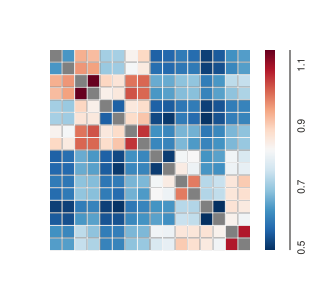

In [21]:
# plot the avg. difference between sequential trees
linked_var = sequential_dist(trees.treelist).var(axis=0)
c, t = plot_matrix(linked_var);
#toyplot.svg.render(c, "../figures/fig-1-vboth-linked-var.svg")
c

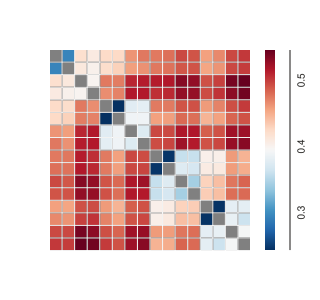

In [22]:
# plot the avg. difference between sequential trees
linked_mean = sequential_dist(trees.treelist).mean(axis=0)
c, t = plot_matrix(linked_mean);
#toyplot.svg.render(c, "../figures/fig-1-vboth-linked-mean.svg")
c

### Phylogenetic decay
Is the difference between unlinked and linked distances

In [37]:
np.nanmean(linked_mean)

0.42983041600891453

In [44]:
plot_matrix((linked_mean / unlinked_mean));

/home/deren/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<svg class="toyplot-canvas-Canvas" height="300.0px" id="tf6a9ded05de142c1a6573fa98dc8c56b" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 320.0 300.0" width="320.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.10 0.15 0.20 0.25

In [43]:
# draw tree showing Ne and g dists
stree.draw(ts='p', width=400, node_sizes=0, node_labels=False, edge_type='p');

<svg class="toyplot-canvas-Canvas" height="265.0px" id="t80c5f63152ae4461bb376f4d68f0cb8b" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 265.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 12500000 25000000

### Plot the rate of change spatially among nodes on the tree
The average delta-genetic-distance between nodes in sequential trees...

In [22]:
# tree.treenode.get_distance()

### Simulate sequence data on genealogies under a GTR model

In [23]:
# simulate loci that are each 3000bp in length
model.sim_loci(nloci=1000, nsites=3e3)
model.write_loci_to_hdf5(name="var-both", outdir="db")

wrote 5 loci to /home/deren/Documents/gentime-attraction/notebooks/db/var-both.seqs.hdf5
